# Student GPA prediction by  Student's Performance Dataset
## By Imtiaz Ali 
### Machine learning Engineer with Bachelors in Mathematics & Statistics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
student_data = pd.read_csv('Student_performance_data _.csv')

In [4]:
student_data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


This is the kaggle data set about students' performance.
# Demographic Details

- *Age*: Ranges from 15 to 18 years.
- *Gender*: Coded as 0 for Male and 1 for Female.
- *Ethnicity*: Coded as:
  - 0: Caucasian
  - 1: African American
  - 2: Asian
  - 3: Other  
  Label Encoding is used to convert categorical data into numerical form.

# Encoding Techniques
- *Label Encoding*: Assigns a unique integer to each category, useful for ordinal data.
- *One-Hot Encoding*: Creates binary columns for each category, useful for nominal data.

- *Parental Education*: Coded as:
  - 0: None
  - 1: High School
  - 2: Some College
  - 3: Bachelor's
  - 4: Higher

- *Study Time Weekly*: Hours of study per week (0–20 hours).
- *Absences*: Number of absences during the school year (0–30).
- *Tutoring*: Indicates tutoring status (0: No, 1: Yes).

- *Parental Support*: Coded as:
  - 0: None
  - 1: Low
  - 2: Moderate
  - 3: High
  - 4: Very High

# Extracurricular Activities

- *Extracurricular Participation*: 0 for No, 1 for Yes.
- *Sports*: 0 for No, 1 for Yes.
- *Music*: 0 for No, 1 for Yes.
- *Volunteering*: 0 for No, 1 for Yes.

# Academic Performance

- *GPA*: Grade Point Average (2.0 to 4.0), influenced by study habits, parental involvement, and extracurricular activities.
- *Grade Class*: Based on GPA:
  - 0: 'A' (GPA ≥ 3.5)
  - 1: 'B' (3.0 ≤ GPA < 3.5)
  - 2: 'C' (2.5 ≤ GPA < 3.0)
  - 3: 'D' (2.0 ≤ GPA < 2.5)
  - 4: 'F' (GPA < 2.0)


In [6]:
student_data.tail()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0
2391,3392,16,1,0,2,17.819907,13,0,2,0,0,0,1,2.140014,1.0


In [7]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [8]:
student_data.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


# Summary Statistics Overview

The summary statistics table provides a concise snapshot of each column's distribution, allowing for the identification of key insights:

1. *Patterns*:  
   - Mean and median values reveal central tendencies.
   - Standard deviation and range indicate data dispersion.

2. *Outliers*:  
   - Minimum and maximum values help detect unusual data points that may require further investigation.

3. *Data Shape*:  
   - The table helps assess distribution shape, including skewness and variability.

4. *Anomalies*:  
   - Unusual statistics, such as high standard deviation or unrealistic min/max values, could signal data quality issues.

### Conclusion:
This table allows you to quickly understand the distribution of each variable, identify patterns and guide further data analysis and visualization.


## Initial Approach: Simple Linear Regression

Initially, we will apply a simple linear regression model to predict *GPA* based on *StudyTimeWeekly*. This will provide a foundational understanding of machine learning predictions and help us establish a baseline for further analysis.This initial approach will give us a basic understanding of how machine learning can be used to make predictions and set the stage for more advanced analyses.

In [9]:

# Select relevant columns 
data = student_data[['StudyTimeWeekly', 'GPA']]

# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (if any) Checks for missing values in the selected columns.
data = data.dropna()
# IF missing values are present then fll values fillna(mean) is  to use

StudyTimeWeekly    0
GPA                0
dtype: int64


## Dependent Variable (Target Variable)
- The variable we're trying to predict or classify.
- Also known as the response, outcome, or label.
- Typically denoted as *y* or *Y*.

## Independent Variable (Predictor Variable)
- The variable(s) used to predict the dependent variable.
- Also referred to as features, inputs, or attributes.
- Typically denoted as *x* or *X*.


## Data Splitting

### Training Set (80% of the data)
- This set is used to *train the model*, i.e., to fit the model to the data.
- The model learns from this data and makes predictions.

### Testing Set (20% of the data)
- This set is used to *evaluate the performance* of the trained model.
- The model makes predictions on this unseen data, and the results are used to assess the model's accuracy.

In [10]:
#  dependent = X and indepdendent variable = y
X = data[['StudyTimeWeekly']]
y = data['GPA']
# Split the data into Training set(80% of the data) and Testing set(20% of the data).
# The random_state=42 ensures reproducibility of the results. it stablize both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_test.head() ,X_train.head()

(      StudyTimeWeekly
 1004         0.135763
 196          1.989925
 2342        10.588715
 1708        16.208658
 435          3.576821,
       StudyTimeWeekly
 642         18.118879
 1752         2.469271
 1401         3.456401
 2032        15.838131
 990          1.045373)

In [12]:
y_test.head() , y_train.head()

(1004    1.427724
 196     3.117354
 2342    2.037769
 1708    3.548521
 435     0.248977
 Name: GPA, dtype: float64,
 642     1.396278
 1752    0.754751
 1401    0.136166
 2032    1.172192
 990     1.747356
 Name: GPA, dtype: float64)

In [13]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [14]:
# Predict on the test set
#Uses the trained model to make predictions on the test set (X_test).
y_pred = model.predict(X_test)


# #  Now our model is ready for predictions.

In [15]:
pd.DataFrame(np.c_[X_test,y_test,y_pred],columns=["study Time"," Real GPA","Predicted GPA"])

,study Time,Real GPA,Predicted GPA
0,0.135763,1.427724,1.600713
1,1.989925,3.117354,1.658657
2,10.588715,2.037769,1.927377
3,16.208658,3.548521,2.103004
4,3.576821,0.248977,1.708249
...,...,...,...
474,8.412605,1.562360,1.859371
475,3.170405,2.174903,1.695548
476,5.141922,2.332540,1.757160
477,10.281614,2.777967,1.917779


## Fine tune to check accuracy of model

In [16]:
#Calculates the Mean Squared Error (MSE) between the actual GPA values (y_test) and the predicted values (y_pred).
mse = mean_squared_error(y_test, y_pred)
#Calculates the R-squared (R²) value, which indicates how well the regression model fits the data.
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.820746738998584
R-squared: 0.007480506788430263


# Performance Metrics

- *Mean Squared Error (MSE)*: An MSE of 0.82 suggests that the model's predictions are not very accurate.
  
- *R-squared (R²)*: An R² value of 0.0075 indicates that only 0.75% of the variance in GPA can be explained by StudyTimeWeekly.  

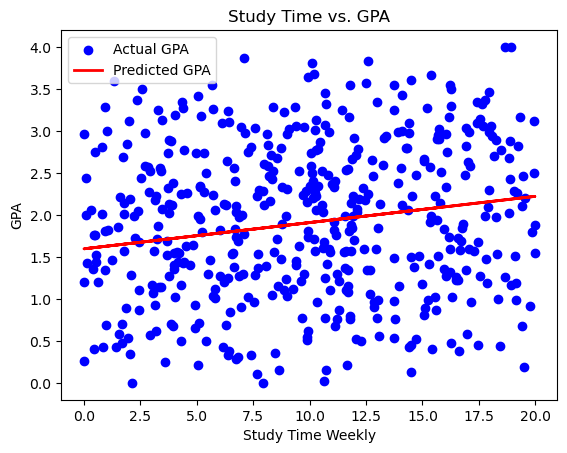

In [19]:
# Plot the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual GPA')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted GPA')
plt.xlabel('Study Time Weekly')
plt.ylabel('GPA')
plt.title('Study Time vs. GPA')
plt.legend()
plt.show()
#This step-by-step explanation provides clarity on each part of the code and 
# what it accomplishes in the process of predicting student GPA based on study time.

# Analysis Summary

- The correlation between *Study Time* and *GPA* is weak, indicating that study time alone is not a strong predictor of GPA.
- The *regression analysis* shows a slight positive relationship between study time and GPA.
- Other factors likely play a significant role in determining academic performance.
  
### Recommendation:
Including more relevant variables in the model, such as parental support, tutoring, extracurricular activities, and absences, could potentially improve its predictive accuracy.

# Multiple Linear Regression Model

We'll build a multiple linear regression model to predict *GPA*, using the following variables as predictors:

- *ParentalSupport*
- *StudyTimeWeekly*
- *Tutoring*
- *Extracurricular* activities
- *Music*
- *Sports*
- *GradeClass*
- *Absences*

### Objective:
The goal is to evaluate how these combined factors contribute to predicting *GPA* and improve the model's predictive accuracy compared to using StudyTimeWeekly alone.

In [23]:
# List all column names in the dataset
student_data.columns.tolist()
# List all column names in the dataset
print(student_data.columns.tolist())

['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA', 'GradeClass']


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# Select relevant features
features = ["ParentalSupport", "StudyTimeWeekly", "Tutoring", "Extracurricular", 
            "Music", "Sports", "GradeClass", "Absences"]
X = student_data[features]
y = student_data["GPA"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_test.head()

,ParentalSupport,StudyTimeWeekly,Tutoring,Extracurricular,Music,Sports,GradeClass,Absences
1004,2,0.135763,0,0,1,1,4.0,17
196,1,1.989925,0,1,0,0,1.0,0
2342,3,10.588715,0,0,0,0,2.0,15
1708,3,16.208658,0,1,0,0,0.0,1
435,1,3.576821,0,0,0,1,4.0,27


In [27]:
X_train.head()

,ParentalSupport,StudyTimeWeekly,Tutoring,Extracurricular,Music,Sports,GradeClass,Absences
642,0,18.118879,1,1,0,1,4.0,24
1752,1,2.469271,0,0,0,0,4.0,19
1401,0,3.456401,0,0,0,0,4.0,25
2032,2,15.838131,1,0,0,0,4.0,25
990,2,1.045373,1,0,1,0,4.0,19


In [28]:
y_test.head()

1004    1.427724
196     3.117354
2342    2.037769
1708    3.548521
435     0.248977
Name: GPA, dtype: float64

In [29]:
y_train.head()

642     1.396278
1752    0.754751
1401    0.136166
2032    1.172192
990     1.747356
Name: GPA, dtype: float64

In [30]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [31]:
comparison_df = pd.DataFrame(np.c_[X_test, y_test, y_pred],columns=features + ["Real GPA", "Predicted GPA"])

# These are the predictions by Multiliear Regression model

In [32]:
comparison_df.head()

,ParentalSupport,StudyTimeWeekly,Tutoring,Extracurricular,Music,Sports,GradeClass,Absences,Real GPA,Predicted GPA
0,2.0,0.135763,0.0,0.0,1.0,1.0,4.0,17.0,1.427724,1.435206
1,1.0,1.989925,0.0,1.0,0.0,0.0,1.0,0.0,3.117354,2.966011
2,3.0,10.588715,0.0,0.0,0.0,0.0,2.0,15.0,2.037769,1.844467
3,3.0,16.208658,0.0,1.0,0.0,0.0,0.0,1.0,3.548521,3.601438
4,1.0,3.576821,0.0,0.0,0.0,1.0,4.0,27.0,0.248977,0.313458


In [33]:
file_path = 'GPA prediction.xlsx'
comparison_df.to_excel(file_path, index=False)

In [34]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.0358432903061601
R-squared: 0.9566551255834274


# Model Performance Evaluation

## MSE Comparison
- *Current Mean Squared Error (MSE):* 0.0358 (3.5%)
- *Previous MSE:* 0.8207 (82%)
  
This significant reduction in MSE indicates that the average squared difference between the predicted GPA and the actual GPA has decreased. The predictions are now much closer to the actual values.

## R-squared (R²) Comparison
- *Current R-squared (R²):* 0.957 (95.7%)
- *Previous R-squared:* 0.0075 (0.7%)

The R² value suggests that approximately *95.7% of the variance* in GPA can be explained by the model, which now includes additional relevant features. This is a remarkable improvement compared to the initial model, which only used *StudyTimeWeekly* as a predictor.

---

### Key Takeaways:
- The *MSE* has dramatically decreased, improving the model's accuracy.
- The *R-squared* value shows that the model can now explain a significant portion of the GPA variance.

In [38]:
import joblib
joblib.dump(model, " Student_GPA_prediction.pkl")

[' Student_GPA_prediction.pkl']

In [39]:
Reg_model=joblib.load(" Student_GPA_prediction.pkl")

In [40]:
model.predict([[2.0,0.135763,0.0,0.0,1.0,1.0,4.0,17.0]])

E:\New folder\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.43520551])

## Input:

- **ParentalSupport**: 2.0
- **StudyTimeWeekly**: 0.135763
- **Tutoring**: 0.0
- **Extracurricular**: 0.0
- **Music**: 1.0
- **Sports**: 1.0
- **GradeClass**: 4.0
- **Absences**: 17.0

## Output:

- **Predicted GPA**: 1.43520551

#### This means that, based on the input features, this model predicts a GPA of approximately **1.44** for this student.


### Conclusion

I successfully developed a linear regression model using a Kaggle dataset, achieving high accuracy in predicting student GPAs. This project provided hands-on experience with data preprocessing, feature engineering, and linear regression. Building on this foundation, my next steps are to further improve accuracy and deploy the model in a real-world setting, enabling predictions that can inform educational strategies and support student success.
